In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings


%matplotlib inline

In [16]:
file = pd.read_excel("C:/Users/dassi/Downloads/COVID-19 in Alabama-2.xlsx")

file_clean = file.dropna(subset=['Cases', 'Deaths'])

In [11]:
file

,Counties,Cases,Total Tested By County,Deaths
0,NaN,NaN,NaN,NaN
1,Autauga,7241,30404,113
2,Baldwin,21868,117931,314
3,Barbour,2345,12786,59
4,Bibb,2685,14728,64
...,...,...,...,...
64,Walker,7338,31398,280
65,Washington,1705,7696,39
66,Wilcox,1269,6161,30
67,Winston,2834,12118,72


In [13]:
file.describe()

,Counties,Cases,Total Tested By County,Deaths
count,67,68,68,68
unique,67,68,68,60
top,Autauga,7241,30404,113
freq,1,1,1,2


In [14]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Counties                67 non-null     object
 1   Cases                   68 non-null     object
 2   Total Tested By County  68 non-null     object
 3   Deaths                  68 non-null     object
dtypes: object(4)
memory usage: 2.3+ KB


In [23]:
file_clean = file.dropna(subset=['Cases', 'Deaths']).copy()

In [25]:
# Make sure to convert 'Cases' and 'Deaths' columns to numeric
file_clean['Cases'] = pd.to_numeric(file_clean['Cases'], errors='coerce')
file_clean['Deaths'] = pd.to_numeric(file_clean['Deaths'], errors='coerce')

# Calculate death rate
file_clean['Death Rate'] = (file_clean['Deaths'] / file_clean['Cases']) * 100

# Remove rows with NaN death rates (optional)
file_clean = file_clean.dropna(subset=['Death Rate'])

# Sort by death rate in descending order
file_sorted = file_clean.sort_values(by='Death Rate', ascending=False)

# Display the result
print(file_sorted[['Counties', 'Death Rate']])




      Counties  Death Rate
24      Dallas    4.380371
12     Choctaw    4.025765
64      Walker    3.815754
43     Lowndes    3.797468
62  Tallapoosa    3.745771
..         ...         ...
45     Madison    1.471000
2      Baldwin    1.435888
41         Lee    1.081214
59      Shelby    0.991916
57     Russell    0.901495

[67 rows x 2 columns]


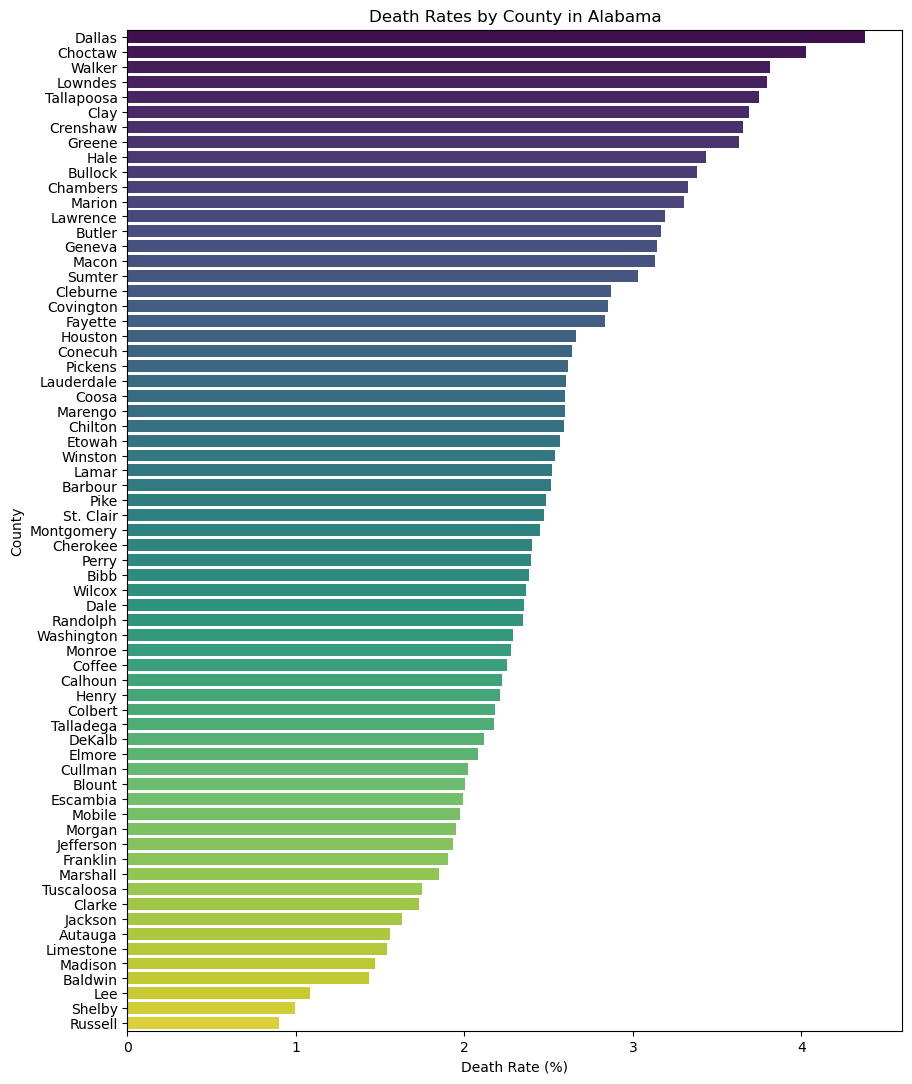

In [28]:
plt.figure(figsize=(10, 13))
sns.barplot(x='Death Rate', y='Counties', data=file_sorted, palette='viridis')
plt.title('Death Rates by County in Alabama')
plt.xlabel('Death Rate (%)')
plt.ylabel('County')
plt.show()